**Grupo 4 - Integrantes: Griselda Itovich, Agustin Helou y María Eva Ortega**

Descripción de la tarea a realizar:

  Se realizará un trabajo sobre un dataset real de Salud Pública de la Pcia. de Neuquén con aproximadamente 60000 registros de consultas medicas en centros de salud y hospitales de toda la provincia. 

Objetivo: Desarrollar un modelo predictivo para el diagnóstico de la diabetes mellitus tipo 2 a partir de datos reales. Se estudiará una muestra particular del dataset con alrededor de 2000 registros: mujeres entre 40 y 70 años.

En primer lugar se analiza de modo general el dataset con el que se va a trabajar, datos faltantes, porcentajes en columnas categoricas relevantes, algunas adecuaciones y visualizaciones generales y descriptivas.

Metodología a aplicar:
Clasificación de la población elegida segun los métodos:
1) KNN
2) Regresión Logística
3) Naive-Bayes

Conclusiones
Se aplicarán diferentes métricas para comparar las metodologías utilizadas y decidir cual resulta más apropiada para emplear.

**Importación de librerías básicas de Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

**Importación y análisis general de las dimensiones del dataset**


In [2]:
data_cruda=pd.read_csv('para_ejercitacion_con_RCVG_1.csv',sep=';',encoding='utf_8')
data=data_cruda
# Elimino posibles duplicados
data = data.drop_duplicates()
print("Dimensiones del dataset original:",data.shape)
print('Cantidad de columnas:',data.shape[1])
print("Tipos de datos en columna:")
data.dtypes.value_counts()

Dimensiones del dataset original: (59965, 50)
Cantidad de columnas: 50
Tipos de datos en columna:


object     34
float64    16
dtype: int64

**Verificación del tipo de datos de las distintas columnas**

In [3]:
data.columns[data.dtypes=='object']

Index(['idPACIENTE', 'SEXO', 'FECHA DE NACIMIENTO', 'PROV/LOC', 'LOCALIDAD',
       'UTMA_CONSULTA_SISTEMA', 'FECHA_UTMA_CONSULTA_VINCULADA',
       'EFECTOR_UTMA_CONSULTA_VINCULADA', 'ZONA_UTMA_CONSULTA_VINCULADA',
       'DIABETES', 'DISLIPEMIA', 'HIPERTENSION', 'OBESIDAD',
       'ENF. CARDIOVASCULAR ESTABLECIDA', 'CARDIOPATIA ISQUEMICA',
       'ENF. CEREBROVASCULAR', 'ENF. ARTERIAL PERIFERICA',
       'LESIONES PIERNA PIE', 'FECHA_UTMA_TA', 'CLASIFICACION_IMC',
       'FECHA_UTMO_IMC', 'FECHA_IMC_REFERENCIA', 'FECHA_HbA1c',
       'FECHA_CREATININEMIA', 'FECHA_CLEARANCE', 'FECHA_RAC', 'DANNO_RENAL',
       'ENFERMEDAD RENAL CRONICA', 'FECHA_UTMO_COLESTEROL_TOTAL',
       'FECHA_UTMO_LDL', 'FECHA FONDO OJO', 'RESULTADO FONDO OJO',
       'FECHA NUTRICION', 'FECHA ODONTO'],
      dtype='object')

In [4]:
data.columns[data.dtypes=='float64']

Index(['TAS', 'TAD', 'PESO', 'TALLA', 'UTMO_IMC', 'IMC_REFERENCIA',
       'DIFERENCIA_IMC', 'PORC_VARIACION_IMC', 'MESES_REFERENCIA',
       'PORC_VARIACION_IMC_ANUALIZADO', 'HbA1c', 'CREATININEMIA', 'CLEARANCE',
       'RAC', 'COLESTEROL_TOTAL', 'COLESTEROL_TOTAL.1'],
      dtype='object')

**Corroboración del porcentaje de datos faltantes**

In [5]:
round(data.isna().sum()*100/59965,2)

idPACIENTE                          0.00
SEXO                                0.00
FECHA DE NACIMIENTO                 0.00
PROV/LOC                            0.00
LOCALIDAD                          41.45
UTMA_CONSULTA_SISTEMA               0.00
FECHA_UTMA_CONSULTA_VINCULADA       0.00
EFECTOR_UTMA_CONSULTA_VINCULADA     0.00
ZONA_UTMA_CONSULTA_VINCULADA        0.00
DIABETES                            0.00
DISLIPEMIA                          0.00
HIPERTENSION                        0.00
OBESIDAD                            0.00
ENF. CARDIOVASCULAR ESTABLECIDA     0.00
CARDIOPATIA ISQUEMICA              98.64
ENF. CEREBROVASCULAR               99.35
ENF. ARTERIAL PERIFERICA           99.73
LESIONES PIERNA PIE                99.20
TAS                                50.23
TAD                                50.24
FECHA_UTMA_TA                      36.26
PESO                               64.20
TALLA                              64.20
UTMO_IMC                           64.17
CLASIFICACION_IM

**Comprobación de la correlación entre las principales features del dataset**

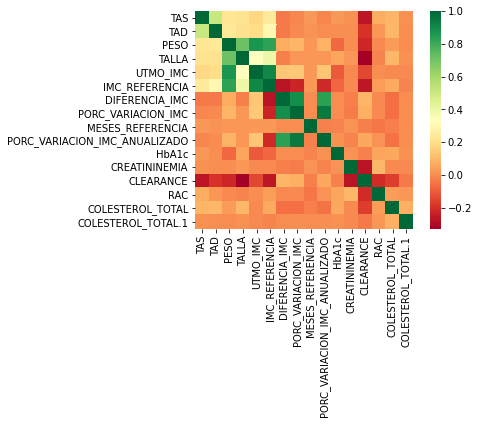

In [6]:
sns.heatmap(data.corr(),square=True,cmap='RdYlGn');

In [7]:
print('Total de Registros del dataset:',data.shape[0])

Total de Registros del dataset: 59965


**Análisis exploratorio de las variables del dataset**

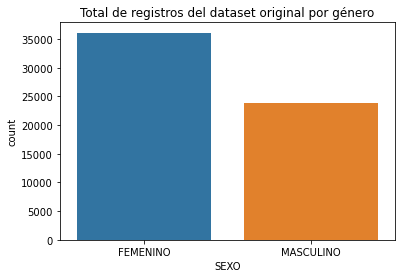

In [8]:
ax=sns.countplot(x='SEXO',data=data)
ax.set_title("Total de registros del dataset original por género");

In [9]:
print('Porcentaje de pacientes con hipertensión:\n',round(data.HIPERTENSION.value_counts()*100/59965,2))

Porcentaje de pacientes con hipertensión:
 NO    57.86
SI    42.14
Name: HIPERTENSION, dtype: float64


Porcentaje de pacientes que presentan diabetes:
 NO     73.93
DM2    25.40
DM1     0.66
Name: DIABETES, dtype: float64


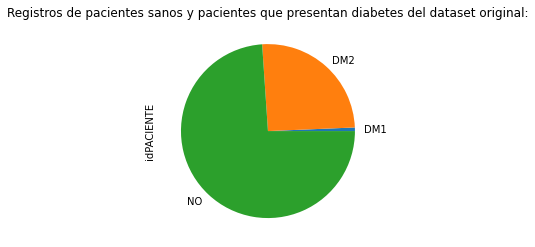

In [10]:
print('Porcentaje de pacientes que presentan diabetes:\n',round(data.DIABETES.value_counts()*100/59965,2))
data_aux_1=data.groupby(['DIABETES']).count().iloc[:,0]*100/59965
data_aux_1.plot.pie();
plt.title('Registros de pacientes sanos y pacientes que presentan diabetes del dataset original:');

In [11]:
print('Porcentaje de pacientes con obesidad:\n', round(data.OBESIDAD.value_counts()*100/59965,2))

Porcentaje de pacientes con obesidad:
 SI    50.15
NO    49.85
Name: OBESIDAD, dtype: float64


In [12]:
data=data.rename(columns={'FECHA DE NACIMIENTO': 'FECHA_DE_NACIMIENTO'})

In [13]:
display(data.head(2))

,idPACIENTE,SEXO,FECHA_DE_NACIMIENTO,PROV/LOC,LOCALIDAD,UTMA_CONSULTA_SISTEMA,FECHA_UTMA_CONSULTA_VINCULADA,EFECTOR_UTMA_CONSULTA_VINCULADA,ZONA_UTMA_CONSULTA_VINCULADA,DIABETES,...,DANNO_RENAL,ENFERMEDAD RENAL CRONICA,COLESTEROL_TOTAL,FECHA_UTMO_COLESTEROL_TOTAL,COLESTEROL_TOTAL.1,FECHA_UTMO_LDL,FECHA FONDO OJO,RESULTADO FONDO OJO,FECHA NUTRICION,FECHA ODONTO
0,2RIIN10249,FEMENINO,22/01/1928,.,NaN,20/08/2021,06/03/2019,"HOSPITAL PROVINCIAL NEUQUEN ""DR. EDUARDO CAST...",ZONA SANITARIA METROPOLITANA,NO,...,DR2,NaN,176.0,22/06/2016,124.0,22/06/2016,NaN,NaN,NaN,NaN
1,2SICA11223,FEMENINO,22/09/1930,ZAPALA,ZAPALA,30/06/2021,05/08/2020,C.S. DON BOSCO,ZONA SANITARIA II,NO,...,DR3,NaN,152.0,24/05/2017,86.0,24/05/2017,NaN,NaN,30/04/2020,NaN


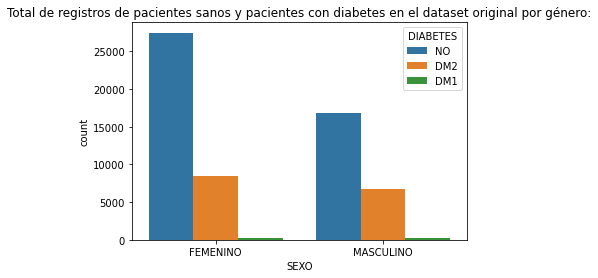

In [14]:
ax=sns.countplot(x='SEXO',hue='DIABETES',data=data)
ax.set_title("Total de registros de pacientes sanos y pacientes con diabetes en el dataset original por género:");

In [15]:
#Transformación de columnas con fechas e inclusión de columnas con edad
data['FECHA_DE_NACIMIENTO']=pd.to_datetime(data['FECHA_DE_NACIMIENTO'])
data['EDAD']=data['FECHA_DE_NACIMIENTO'].apply(lambda x: 2021- x.year)
data['ANIO_NACIMIENTO']=np.zeros(59965)
data['ANIO_NACIMIENTO']=data['FECHA_DE_NACIMIENTO'].apply(lambda x: x.year)
data["Grupos_Edad"]=pd.cut(data['ANIO_NACIMIENTO'],[0,1930,1940,1950,1960,1970,1980,2020])

**Se grafica la diferencia de consultas médicas en mujeres y hombres en función de la edad a partir del dataset original**

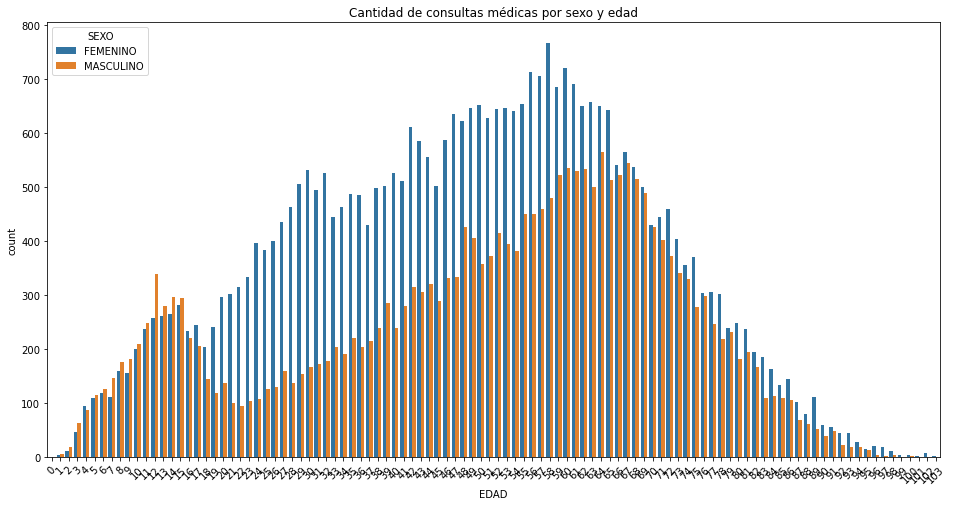

In [16]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='EDAD',hue='SEXO',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Cantidad de consultas médicas por sexo y edad')
plt.show()

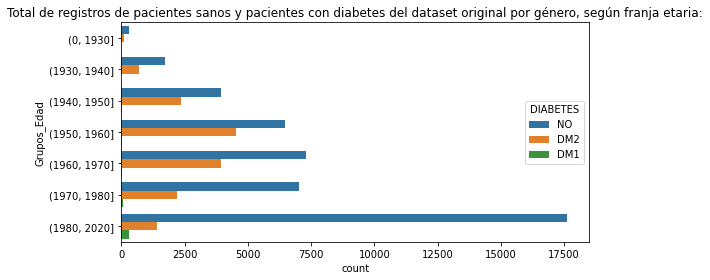

In [17]:
plt.figure(figsize=(8,4))
ax=sns.countplot(y='Grupos_Edad',hue='DIABETES',data=data)
ax.set_title("Total de registros de pacientes sanos y pacientes con diabetes del dataset original por género, según franja etaria:");
plt.tight_layout()
plt.show()

**Se realiza un gráfico de dispersión para analizar la relación entre la edad y la indicación del examen dosaje de hemoglobina glicosilada (HbA1c)** 

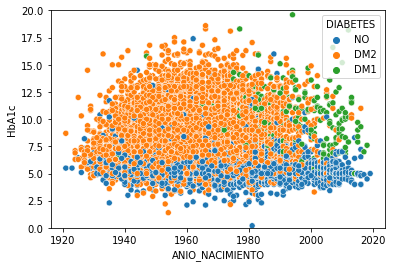

In [18]:
sns.scatterplot(data=data,x='ANIO_NACIMIENTO',y='HbA1c',hue='DIABETES');
plt.ylim(0,20);
#plt.show()

**Definición del dataset para trabajar con los modelos de clasificación. Se selecciona la muestra de mujeres entre 40 y 70 años.**

Se elegió esta muestra para el desarrollo del análisis debido que en las mujeres que padecen diabetes, se observa que existe una mayor prevalencia de patologías cardiológicas, información que fué posible recopilar a partir de las columnas originales del dataset. Además, dicha población se encuentra representada por una cantidad considerable datos, respecto al resto de los subconjuntos determinados por el género y la edad, lo que contribuyó a su selección para la exploración.

In [19]:
data_new=data[((data.ANIO_NACIMIENTO < 1980)& (data.SEXO=='FEMENINO') & (data.ANIO_NACIMIENTO>1950))]
print(data_new.shape)

(18047, 53)


**Limpieza de datos de acuerdo con las features a considerar**

In [20]:
#lista = ['EDAD','TAS', 'TAD', 'HbA1c', 'UTMO_IMC','CREATININEMIA','CLEARANCE','OBESIDAD','DISLIPEMIA','ENF. CARDIOVASCULAR ESTABLECIDA','DIABETES']
data_new=data_new[['EDAD','TAS','TAD','UTMO_IMC','HbA1c','CREATININEMIA','CLEARANCE','OBESIDAD','DISLIPEMIA','ENF. CARDIOVASCULAR ESTABLECIDA','DIABETES']]
data_new=data_new.dropna()
print(data_new.shape)
print('Porcentajes de de pacientes sanos y pacientes con diabetes en la población a clasificar mediante modelos')
data_new.DIABETES.value_counts()*100/2234

(2234, 11)
Porcentajes de de pacientes sanos y pacientes con diabetes en la población a clasificar mediante modelos


DM2    74.843330
NO     24.709042
DM1     0.447628
Name: DIABETES, dtype: float64

In [21]:
data_new.describe()

,EDAD,TAS,TAD,UTMO_IMC,HbA1c,CREATININEMIA,CLEARANCE
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,57.002686,130.828111,79.704118,36.252923,7.468554,0.895201,88.224691
std,7.598465,35.836232,11.901285,7.361120,2.406029,2.748085,22.892173
min,42.000000,80.000000,8.000000,19.400000,2.500000,0.000000,0.230000
25%,51.000000,120.000000,70.000000,31.202500,5.700000,0.620000,74.005000
50%,58.000000,130.000000,80.000000,35.310000,6.600000,0.730000,91.800000
75%,63.000000,140.000000,90.000000,40.385000,9.100000,0.870000,102.720000
max,70.000000,1555.000000,150.000000,76.590000,18.300000,100.000000,183.000000


In [22]:
# ELIMINACION DE OUTLIERS NOTORIOS
data_new=data_new[~(data_new.TAS==1555)]
data_new=data_new[~(data_new.TAD==8)]
data_new=data_new[~(data_new.CREATININEMIA==100)]
data_new=data_new[~(data_new.CREATININEMIA==80)]
#DESCARTAMOS LOS CASOS DE DIABETES "DM1" por ser una porcion muy poco significativa n la poblacion a estudiar
data_new=data_new[~(data_new.DIABETES=='DM1')]
data_new.describe()

,EDAD,TAS,TAD,UTMO_IMC,HbA1c,CREATININEMIA,CLEARANCE
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,57.021622,130.155856,79.749550,36.291414,7.452410,0.813225,88.425225
std,7.595953,19.367535,11.815976,7.346551,2.391865,0.583859,22.672133
min,42.000000,80.000000,30.000000,20.190000,2.500000,0.000000,3.150000
25%,51.000000,120.000000,70.000000,31.230000,5.700000,0.620000,74.105000
50%,58.000000,130.000000,80.000000,35.350000,6.600000,0.730000,91.930000
75%,63.000000,140.000000,90.000000,40.422500,9.022500,0.870000,102.772500
max,70.000000,216.000000,150.000000,76.590000,17.500000,12.330000,183.000000


**Transformación de las variables para su aplicación en los modelos de clasificación:**

In [23]:
data_new['OBESIDAD']=data_new['OBESIDAD'].apply(lambda x:1 if x=='SI' else 0)
data_new['ENF. CARDIOVASCULAR ESTABLECIDA']=data_new['ENF. CARDIOVASCULAR ESTABLECIDA'].apply(lambda x:1 if x=='SI' else 0)
data_new['DISLIPEMIA']=data['DISLIPEMIA'].apply(lambda x:1 if x=='SI' else 0)
data_new['DIABETES']=data_new['DIABETES'].apply(lambda x:0 if x=='NO' else 1)
data_new.head(3)

,EDAD,TAS,TAD,UTMO_IMC,HbA1c,CREATININEMIA,CLEARANCE,OBESIDAD,DISLIPEMIA,ENF. CARDIOVASCULAR ESTABLECIDA,DIABETES
2605,70,120.0,70.0,34.70,6.6,0.67,88.61,0,0,0,0
2764,70,100.0,60.0,30.31,13.7,0.64,92.40,1,0,0,1
3448,70,140.0,80.0,31.53,9.0,0.95,62.81,1,0,0,1


In [24]:
data_new.DIABETES.value_counts(normalize=True)

1    0.751802
0    0.248198
Name: DIABETES, dtype: float64

**1. Modelo de clasificación con KNN**

In [25]:
X=data_new.drop(['DIABETES'],axis=1)
y=data_new['DIABETES']

**Importación de librerías para modelos de clasificación**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#primer modelo con knn con n=4
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [29]:
y_pred=model.predict(X_test)

In [30]:
#evaluacion del modelo knn con n=4 con metricas habituales
print('accuracy_score con KNN para n=4:', accuracy_score(y_test,y_pred))
print('recall_score con KNN para n=4:', recall_score(y_test,y_pred))
print('precision_score con KNN para n=4:', precision_score(y_test,y_pred))
print('f1_score con KNN para n=4:', f1_score(y_test,y_pred))

accuracy_score con KNN para n=4: 0.7315315315315315
recall_score con KNN para n=4: 0.7937649880095923
precision_score con KNN para n=4: 0.8401015228426396
f1_score con KNN para n=4: 0.8162762022194822


In [31]:
#matriz de confusion para el modelo knn con n=4
confusion_matrix(y_test,y_pred)

array([[ 75,  63],
       [ 86, 331]], dtype=int64)

**Determinacion del mejor n para el modelo knn**

In [32]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [33]:
# se buscar determinar el n que da el mejor rendimiento del modelo
df_scores= scores_knn(X_train, y_train, 1, 25, 1)
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]

In [34]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [35]:
y_pred_best_k = model.predict(X_test)

In [36]:
## evaluacion del modelo knn con n=21 (best_k)
print('accuracy_score con KNN best_k:', round(accuracy_score(y_test,y_pred_best_k),2))
print('recall_score con KNN best_k:', round(recall_score(y_test,y_pred_best_k),2))
print('precision_score con KNN best_k:', round(precision_score(y_test,y_pred_best_k),2))
print('f1_score con KNN best_k:', round(f1_score(y_test,y_pred_best_k),2))

accuracy_score con KNN best_k: 0.76
recall_score con KNN best_k: 0.92
precision_score con KNN best_k: 0.79
f1_score con KNN best_k: 0.85


Confusion matrix para modelo knn con n= 19 

 [[ 38 100]
 [ 33 384]]


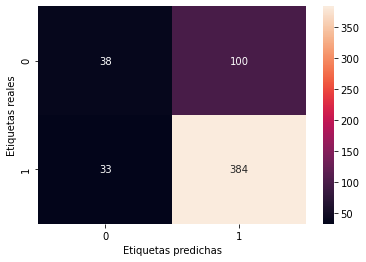

In [37]:
conf_mat=confusion_matrix(y_test,y_pred_best_k)
print('Confusion matrix para modelo knn con n=',best_k, '\n\n', conf_mat)
sns.heatmap(confusion_matrix(y_test, y_pred_best_k), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [38]:
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

print('Spec umbral 0.5 =', specificity(y_test, y_pred_best_k))

Spec umbral 0.5 = 0.2753623188405797


In [39]:
#generacion de tabla con metricas para los tres modelos
resultados=pd.DataFrame()
resultados.loc['Vecinos Cercanos','Accuracy']=accuracy_score(y_test, y_pred_best_k)
resultados.loc['Vecinos Cercanos','Recall']=recall_score(y_test,y_pred_best_k)
resultados.loc['Vecinos Cercanos','Precision']=precision_score(y_test, y_pred_best_k)
resultados.loc['Vecinos Cercanos','F1 Score']=f1_score(y_test, y_pred_best_k)
resultados.loc['Vecinos Cercanos','Specificity']=specificity(y_test, y_pred_best_k)
resultados.loc['Vecinos Cercanos','Hiperparámetros']= 'Vecinos ' + str(best_k)

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

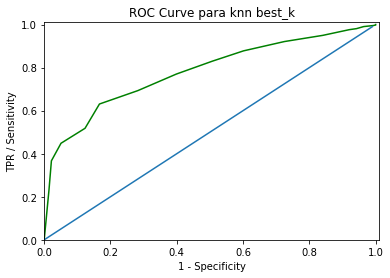

AUC= 0.7792114134779133


In [41]:
y_pred_proba = model.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

df_1 = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para knn best_k')
plt.plot(df_1['fpr'],df_1['tpr'],'g')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc_1 = auc(fpr_log, tpr_log)
print('AUC=', auc_1)

**2. Modelo de clasificación con Regresión logística**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12,shuffle=True)

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model=LogisticRegression(penalty='none')
model.fit(X_train,y_train);
y_pred=model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
#VER LO DE UMBRALES
#y_pred_065=binarize(y_pred_proba,threshold=0.65)[:,1]
#y_pred_065=(y_pred_proba[:,1]>0.65).astype(int)

In [46]:
print('accuracy_score con REGLOG:', round(accuracy_score(y_test,y_pred),2))
print('recall_score con REGLOG:', round(recall_score(y_test,y_pred),2))
print('precision_score con REGLOG:', round(precision_score(y_test,y_pred),2))
print('f1_score con REGLOG:', round(f1_score(y_test,y_pred),2))

accuracy_score con REGLOG: 0.77
recall_score con REGLOG: 0.91
precision_score con REGLOG: 0.81
f1_score con REGLOG: 0.86


In [47]:
print('Spec umbral 0.5 =', specificity(y_test, y_pred))

Spec umbral 0.5 = 0.34782608695652173


In [48]:
resultados.loc['Regresión Logística','Accuracy']=accuracy_score(y_test, y_pred)
resultados.loc['Regresión Logística','Recall']=recall_score(y_test,y_pred)
resultados.loc['Regresión Logística','Precision']=precision_score(y_test, y_pred)
resultados.loc['Regresión Logística','F1 Score']=f1_score(y_test, y_pred)
resultados.loc['Regresión Logística','Specificity']=specificity(y_test, y_pred)
resultados.loc['Regresión Logística','Hiperparámetros']= 'Default alpha=1'

Confusion matrix para modelo Reg. Log.

 [[ 48  90]
 [ 37 380]]


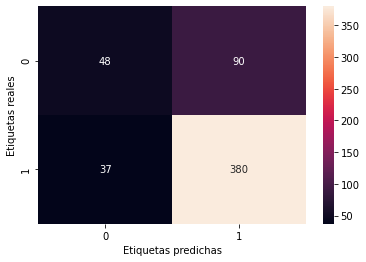

In [49]:
conf_mat=confusion_matrix(y_test,y_pred)
print('Confusion matrix para modelo Reg. Log.\n\n', conf_mat)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

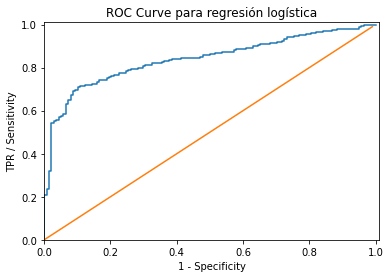

AUC= 0.8385986862683765


In [50]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

df_2 = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para regresión logística')
plt.plot(df_2['fpr'],df_2['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc_2=auc(fpr_log, tpr_log)
print('AUC=', auc_2)

**Aplicacion de GridSearch con regresion logistica**

In [51]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
model = [LogisticRegression()]

In [53]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1'],
     'solver': ['liblinear']},
]

In [54]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [55]:
grids = []
for i in range(len(model)):
    gs = GridSearchCV(estimator=model[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')


In [56]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.7832191039607532
LogisticRegression(C=100, penalty='l1', solver='liblinear')
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [57]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020987,0.004791,0.002801,0.000980,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.796407,0.820359,...,0.754491,0.754491,0.771084,0.831325,0.783133,0.783133,0.789157,0.781412,0.029057,4
1,0.022184,0.002713,0.003499,0.001023,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.796407,0.820359,...,0.754491,0.748503,0.771084,0.837349,0.795181,0.783133,0.789157,0.782620,0.031002,3
2,0.022291,0.001484,0.002809,0.000586,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.796407,0.820359,...,0.754491,0.748503,0.771084,0.837349,0.795181,0.783133,0.789157,0.783219,0.030033,1
3,0.019183,0.003806,0.002299,0.000641,1000,l1,liblinear,"{'C': 1000, 'penalty': 'l1', 'solver': 'liblin...",0.796407,0.820359,...,0.754491,0.748503,0.771084,0.837349,0.795181,0.783133,0.789157,0.783219,0.030033,1


In [58]:
y_preds_log = grids[0].predict(X_test)

In [59]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       138
           1       0.81      0.91      0.86       417

    accuracy                           0.77       555
   macro avg       0.69      0.63      0.64       555
weighted avg       0.75      0.77      0.75       555



**3. Modelo de clasificación con Naive Bayes**

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import binarize

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [62]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
print('accuracy_score con NB:', round(accuracy_score(y_test,y_pred),2))
print('recall_score con NB:', round(recall_score(y_test,y_pred),2))
print('precision_score con NB:', round(precision_score(y_test,y_pred),2))
print('f1_score con NB:', round(f1_score(y_test,y_pred),2))

accuracy_score con NB: 0.69
recall_score con NB: 0.62
precision_score con NB: 0.95
f1_score con NB: 0.75


In [64]:
print('Spec umbral 0.5 =', specificity(y_test, y_pred))

Spec umbral 0.5 = 0.8913043478260869


In [65]:
resultados.loc['Naive-Bayes','Accuracy']=accuracy_score(y_test, y_pred)
resultados.loc['Naive-Bayes','Recall']=recall_score(y_test,y_pred)
resultados.loc['Naive-Bayes','Precision']=precision_score(y_test, y_pred)
resultados.loc['Naive-Bayes','F1 Score']=f1_score(y_test, y_pred)
resultados.loc['Naive-Bayes', 'Specificity']=specificity(y_test,y_pred)
resultados.loc['Naive-Bayes','Hiperparámetros']= 'Gaussiana'

Confusion matrix con modelo NB

 [[123  15]
 [158 259]]


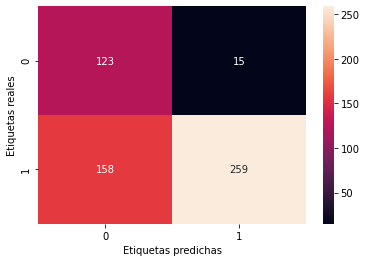

In [66]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix con modelo NB\n\n', conf_mat)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

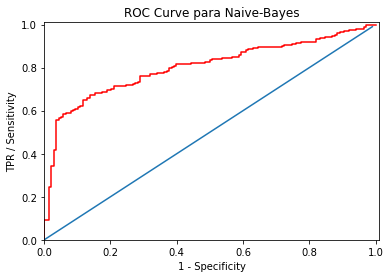

AUC= 0.8014110450769818


In [67]:
y_pred_proba = model.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

df_3 = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para Naive-Bayes')
plt.plot(df_3['fpr'],df_3['tpr'],'r')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc_3=auc(fpr_log, tpr_log)
print('AUC=', auc_3)

In [68]:
resultados.loc[:,'AUC']=[auc_1,auc_2,auc_3]

**Resultados generales de los tres modelos de clasificación**

In [69]:
resultados=resultados[['Accuracy','Recall','Precision','F1 Score','Specificity','AUC','Hiperparámetros']]
display(resultados)

,Accuracy,Recall,Precision,F1 Score,Specificity,AUC,Hiperparámetros
Vecinos Cercanos,0.760360,0.920863,0.793388,0.852386,0.275362,0.779211,Vecinos 19
Regresión Logística,0.771171,0.911271,0.808511,0.856821,0.347826,0.838599,Default alpha=1
Naive-Bayes,0.688288,0.621103,0.945255,0.749638,0.891304,0.801411,Gaussiana


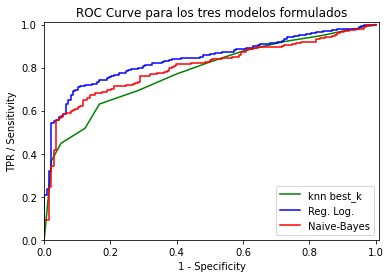

In [70]:
fig,ax = plt.subplots()
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para los tres modelos formulados')

ax.plot(df_1['fpr'],df_1['tpr'],'g',label='knn best_k')
ax.plot(df_2['fpr'],df_2['tpr'],'b',label='Reg. Log.')
ax.plot(df_3['fpr'],df_3['tpr'],'r',label='Naive-Bayes')

ax.legend()
plt.show()

**Se realizan pruebas con KMeans en Métricas vinculadas con la Presion Arterial**

Armado y limpieza del dataset 

In [71]:
df_kmeans= data[['TAS','TAD','UTMO_IMC','EDAD','COLESTEROL_TOTAL','SEXO']]
df_kmeans= pd.get_dummies(df_kmeans, prefix=['SEXO'],drop_first=True)
df_kmeans= df_kmeans.loc[(df_kmeans.TAS < 250) & (df_kmeans.TAS > 50)]
df_kmeans= df_kmeans.loc[(df_kmeans.TAD < 130) & (df_kmeans.TAD > 25)]
df_kmeans= df_kmeans.loc[(df_kmeans.UTMO_IMC < 75) & (df_kmeans.UTMO_IMC > 13.5)]
df_kmeans= df_kmeans.loc[(df_kmeans.COLESTEROL_TOTAL < 350) & (df_kmeans.COLESTEROL_TOTAL > 80)]
df_kmeans.describe()

,TAS,TAD,UTMO_IMC,EDAD,COLESTEROL_TOTAL,SEXO_MASCULINO
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,124.200079,76.746952,33.744691,47.696754,182.807888,0.313935
std,20.245925,12.939486,6.858292,18.947951,41.275911,0.464109
min,60.000000,30.000000,14.790000,4.000000,82.000000,0.000000
25%,110.000000,70.000000,29.510000,34.000000,154.000000,0.000000
50%,120.000000,80.000000,32.990000,50.000000,179.960000,0.000000
75%,140.000000,81.000000,37.510000,62.000000,209.000000,1.000000
max,240.000000,127.000000,70.590000,100.000000,349.000000,1.000000


Armado del modelo y gráfico del mismo con los datos originales

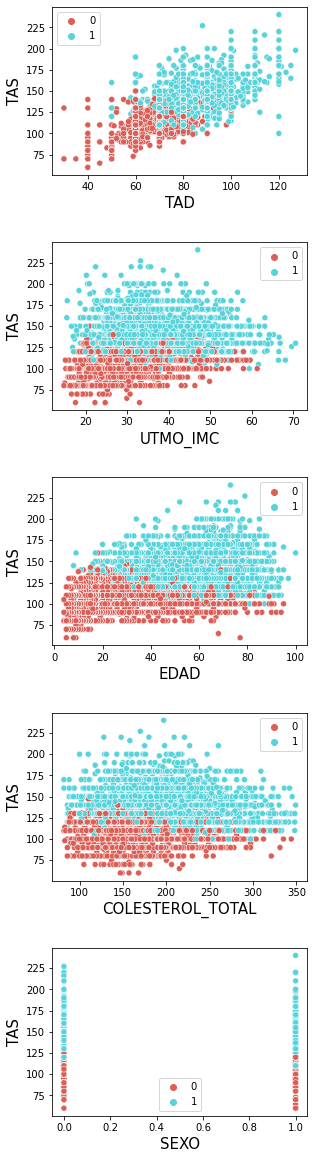

In [72]:
from sklearn.cluster import KMeans
X=df_kmeans
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X);
kmeans=KMeans(n_clusters=2,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_scaled)
labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides
fig = plt.figure(figsize=(5,20))
gs = fig.add_gridspec(6,1)
for i,ii,iii in zip([1,2,3,4,5],['TAD','UTMO_IMC','EDAD','COLESTEROL_TOTAL','SEXO'],['ax1','ax2','ax3','ax4','ax5']):
 iii = fig.add_subplot(gs[i, 0])
 sns.scatterplot(x=X.iloc[:,i],y=X.iloc[:,0],hue=labels,legend='full',palette=sns.color_palette("hls", 2),ax= iii);
 plt.xlabel(ii,fontsize=15);plt.ylabel('TAS',fontsize=15);
fig.tight_layout(pad=3.0)
plt.show()

Se grafica el modelo con los centroides y los datos escalados

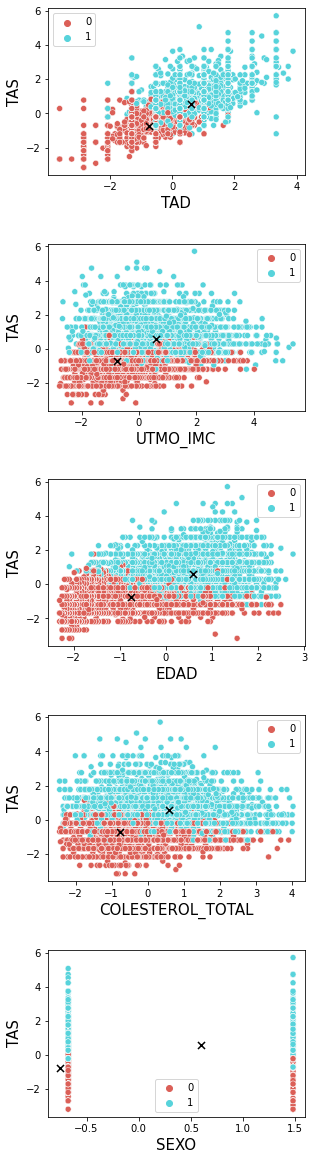

In [73]:
fig = plt.figure(figsize=(5,20))
gs = fig.add_gridspec(6,1)
for i,ii,iii in zip([1,2,3,4,5],['TAD','UTMO_IMC','EDAD','COLESTEROL_TOTAL','SEXO'],['ax1','ax2','ax3','ax4','ax5']):
 iii = fig.add_subplot(gs[i, 0])
 sns.scatterplot(x=X_scaled[:,i],y=X_scaled[:,0],hue=labels,legend='full',palette=sns.color_palette("hls", 2),ax= iii);
 plt.xlabel(ii,fontsize=15);plt.ylabel('TAS',fontsize=15);
 plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');
fig.tight_layout(pad=3.0)
plt.show()

### Conclusiones

Se comprobó que a partir de la utilización de datos reales y de las variables seleccionadas del dataset, se lograron construir modelos que contribuyeron a la predicción de la diabetes miellitus tipo 2. Entre ellas la edad, presión arterial (TAS y TAD), último índice de masa corporal, análisis de hemoglobina glicosilada (hba1c), creatininemia, clearance, obesidad, dislipemia y enfermedad cardiovascular establecida.

El mejor resultado fue obtenido a partir del modelo de Naive-Bayes, con una precisión del 94%, y en general con una mayor precisión para las métricas de Specificity y ROC AUC.

### Consideraciones

Se puede estimar que nuestro análisis puede verse afectado al haber trabajado con un conjunto de datos desbalanceado, es decir, un dataset donde el número de observaciones pertenecientes a una clase es significativamente mayor que las pertenecientes a las otras clases. En este caso particular, al haber trabajado con una población donde con elevada prevalencia de la enfermedad en comparación con grupos con otro género o clasificación etaria.